# 자연어처리의 기본

- 자연어 처리(NLP)는 컴퓨터와 인간 언어 간의 상호 작용과 관련된 언어학, 컴퓨터 과학 및 인공 지능 하위 분야로, 특히 대량의 자연어 데이터를 처리하고 분석할 수 있도록 컴퓨터를 프로그래밍하는 방법을 말한다.(Wikipedia)

- 자연어 처리(natural language)란 사람들이 일상생활에서 자연스럽게 사용하는 언어를 말함.

- 사람들 사이에서 이루어지는 대화는 일반적으로 자연어가 사용되지만, 컴퓨터는 그렇지 않다. 사람이 컴퓨터와 대화해주기 위해서는 정제작업이 필요

- 컴퓨터에게 원하는 특정한 일을 시키고 싶을 때에는 컴퓨터에게 정해진 프로그래밍 언어로 작성해줘야 한다. 프로그램을 작성할 때 언어의 규칙이 정확히 지켜지지 않으면 오류가 발생하거나 원치 않는 결과는 받게 된다.

- NLP분야는 컴퓨터가 문장어를 이해하거나 생성할 수 있도록 하는 학문.

<img src = 'https://blog.kakaocdn.net/dn/P2jwU/btqQsucF3f4/e4JN9e8aIs0kPkmnzkB6Ek/img.png'>

- 자연어 이해(NLU, Natural language undestanding), 자연어 생성(NLG, natural language generation) 분야가 있음.

- NLU와 NLG는 입출력이 서로 반대기 때문에 서로 처리 방법이 다름. 연구도 다르게 진행이 됨.
- 음성인식과 같이 시너지 효과를 냄.

<img src='https://blog.kakaocdn.net/dn/bfMwVH/btq9I3z48QL/p6rigTHn2iq54674lRw7J1/img.png'>
- 데이터 정제에는 노이즈를 식별하고 제거, 문자 정규화, 데이터 마스킹, 토큰화, 품사 태깅, 개체명 인식 등이 포함되어 있다.

- 출처 : https://yuna96.tistory.com/86

## Word2vec

- 원 핫 인코딩을 사용하면서도 단어 간 유사도를 반영할 수 있도록 단어의 의미를 벡터화하는 방법
    - 비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다 는 분포 가설을 따르는 분산 표현 방법을 사용


### CBOW(Continuous Bag Of Word)

- 주변에 있는 단어들을 입력으로 중간에 있는 단어들을 예측하는 방법
    - 윈도우를 두고, 윈도우 내의 주변 단어의 벡터로 중심 단어의 벡터를 예측한다.
    - Skip-Gram에 비해 몇 배 빠른 훈련이 가능하며, 빈번한 단어를 예측하는 데 더 나은 정확도를 가진다.
<img src='https://images.velog.io/images/aqaqsubin/post/5ae18e85-f0ba-4246-9430-4ef9b5e5744a/cbow_sliding_window.jpeg'>

- 출처 : https://velog.io/@aqaqsubin/Word2Vec-Word-to-Vector

- Word2Vec은 입력층과 출력층 사이에 하나의 은닉층이 존재하며 이는 투사층(Projection Layer)라고 불린다.

<img src='https://images.velog.io/images/aqaqsubin/post/4953a96e-f6af-4396-9478-67668a57899b/cbow.jpeg'>

- 출처 : https://velog.io/@aqaqsubin/Word2Vec-Word-to-Vector
    - 스코어를 계산하는 방법은 블로그를 참고해보자

### Skip-Gram

- 중심 단어를 통해 주변에 있는 단어들을 예측하는 방법
    - 소량의 학습 데이터에서도 잘 동작하며, 자주 사용하지 않는 희귀한 단어를 예측할 수 있다. (하지만 계산 비용이 크다는 문제점이 있다.)
- 마찬가지로 중심 단어에 윈도우를 두고, 윈도우 내의 주변 단어의 임베딩 벡터를 예측

<img src='https://images.velog.io/images/aqaqsubin/post/fd2fdb22-d883-446f-82d9-5c4568719a0c/skip_gram.jpeg'>

- 출처 ;https://velog.io/@aqaqsubin/Word2Vec-Word-to-Vector(계산하는 방법은 블로그를 참고하자)

##### **영어 Word2Vec 만들기**

-  Gensim은 Python 기반의 Text mining library이며, 토픽 모델링, word2vec를 지원한다.
- Gensim의 목적은 Topic modelling for humans로 자연어 처리에 특화

In [1]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/yongwoo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# 훈련 데이터 다운로드
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f2506527850>)

훈련 데이터 파일은 xml 문법으로 작성되어 있어 자연어를 얻기 위해서는 전처리가 필요합니다. 얻고자 하는 실질적 데이터는 영어문장으로만 구성된 내용을 담고 있는 <content>와 </content> 사이의 내용입니다. 전처리 작업을 통해 xml 문법들은 제거하고, 해당 데이터만 가져와야 합니다. 뿐만 아니라, <content>와 </content> 사이의 내용 중에는 (Laughter)나 (Applause)와 같은 배경음을 나타내는 단어도 등장하는데 이 또한 제거해야 합니다.

In [3]:
#훈련 데이터 전처리
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [4]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [5]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


**Word2Vec 훈련시키기**

### 가중치 행렬 W와 W'을 학습



```
model = Word2Vec(sentences=food_combinations,
                 vector_size=args.emb_dim,
                 window=7,
                 min_count=0,
                 workers=4,
                 sg=0,
                 epochs=5000)
```
- 파라미터
1. size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
2. window = 컨텍스트 윈도우 크기
3. min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
4. workers = 학습을 위한 프로세스 수
5. sg = 0은 CBOW, 1은 Skip-gram.



In [6]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

- Word2Vec는 입력한 단어에 대해서 가장 유사한 단어들을 출력하는 model.wv.most_similar을 지원

In [7]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8407325148582458), ('guy', 0.7980861067771912), ('lady', 0.7765907645225525), ('boy', 0.7476335763931274), ('girl', 0.7414006590843201), ('kid', 0.7176918387413025), ('soldier', 0.7162606716156006), ('gentleman', 0.712772011756897), ('poet', 0.6794468760490417), ('surgeon', 0.640689492225647)]


- man과 유사한 단어로 woman, guy, boy, lady, girl, gentleman, soldier, kid 등을 출력하는 것을 볼 수 있습니다. Word2Vec를 통해 단어의 유사도를 계산할 수 있게 되었습니다.

**Word2Vec 모델 저장하고 로드하기**

In [8]:
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [ ]:
model_result = loaded_model.most_similar("man")
print(model_result)

한국어 Word2Vec 만들기(네이버 영화 리뷰)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import numpy as np

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f4210cd11d0>)

In [3]:
#상위 5개 출력
train_data = pd.read_table('ratings.txt')

In [4]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [8]:
#총 리뷰 개수를 확인
print(len(train_data)) # 리뷰 개수 출력

200000


In [9]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


- 결측값이 존재하므로 결측값이 존재하는 행을 제거합니다.

In [10]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [11]:
#결측값이 삭제된 후의 리뷰 개수를 확인
print(len(train_data)) # 리뷰 개수 출력

199992


In [12]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [13]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [15]:
from tqdm import tqdm
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [04:00<00:00, 830.91it/s] 


In [17]:
train_data['tokenized']= tokenized_data

In [18]:
train_data

,id,document,label,tokenized
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1,"[어리다, 때, 보고, 지금, 다시, 보다, 재밌다, ㅋㅋ]"
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1,"[디자인, 을, 배우다, 학생, ,, 외국, 디자이너, 그, 일군, 전통, 을, 통..."
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1,"[폴리스스토리, 시리즈, 1, 부터, 뉴, 까지, 버리다, 하나, 없다, .., 최..."
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1,"[오다, .., 연기, 진짜, 개, 쩔다, .., 지루하다, 생각, 몰입, 보다, ..."
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1,"[안개, 자욱하다, 밤하늘, 뜨다, 있다, 초승달, 같다, 영화, .]"
...,...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0,"[포켓, 몬스터, 짜다, ㅡㅡ, ;;]"
199996,3302770,쓰.레.기,0,"[쓰다, ., 레, ., 기]"
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0,"[완전, 사이코, 영화, ., 마지막, 더욱더, 영화, 질, 을, 떨다, 트, 린다..."
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0,"[왜, 난, 재미없다, ㅠㅠ, 라따뚜이, 보다, 스머프, 보다, 그, 런가, ㅋㅋ]"


In [33]:
import csv
with open('tokenized_review.csv', 'w') as f:
    writer= csv.writer(f)
    writer.writerows(tokenized_data)


리뷰의 최대 길이 : 95
리뷰의 평균 길이 : 12.338453538141525


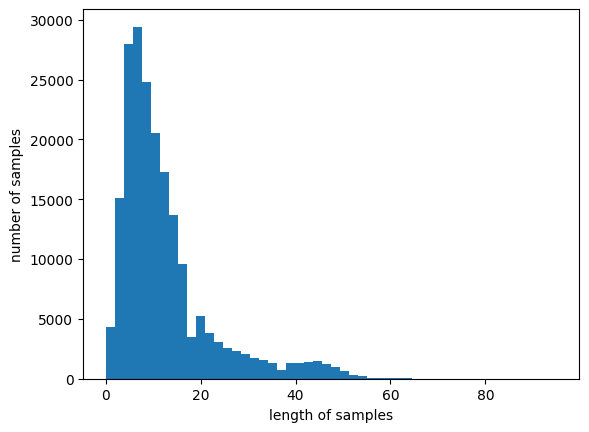

In [20]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

- Word2Vec으로 토큰화 된 네이버 영화 리뷰 데이터를 학습

In [21]:
from gensim.models import Word2Vec
# tokenized 된 corpus를 넣을 때 2차원 리스트 형태로 넣어야 올바르게 문맥을 학습함
model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [22]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(17615, 100)

In [23]:
print(model.wv.most_similar("최민식"))

[('한석규', 0.8444275856018066), ('안소니', 0.8230669498443604), ('엄정화', 0.8220962285995483), ('조재현', 0.8215829730033875), ('문소리', 0.8205462098121643), ('설경구', 0.8202551603317261), ('능청', 0.819291353225708), ('이정재', 0.8180589079856873), ('신현준', 0.8179561495780945), ('조진웅', 0.8176201581954956)]


In [24]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8562020063400269), ('sf', 0.8365859985351562), ('블록버스터', 0.8331754207611084), ('무협', 0.8275222182273865), ('호러', 0.8253253698348999), ('느와르', 0.8136299252510071), ('무비', 0.8107095956802368), ('정통', 0.809955894947052), ('물', 0.8028876781463623), ('물의', 0.8028355240821838)]


## Skip-gram

- 중심 단어(center word)로부터 주변 단어(context word)를 예측하는 방법

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdkXNMB%2FbtrziwEVjNX%2FoGN75xeTOQcUMPSsmPrxzK%2Fimg.png'>

### Negative Samling

word2vec의 CBOW와 Skip-gram 모두 단어 개수가 많아질수록 계산 복잡도가 증가하여 연산 속도가 저하된다는 한계점을 보완하기 위해 제안되었습니다.

$L_{CBOW} = - \sum_{j=1}^{|V|} y_j log(\hat{y})$

$L_{Skip-gram} = - \sum_{j=0 j\neq m }^{2m} \sum_{k=1}^{|V|} y_k^{(c-j)} log(\hat{y}_k)^{(c-j)}$

- 수식에서 알 수 있듯이, CBOW와 Skip-gram\는 역전파 과정에서 단어 집합의 크기(V)만큼 연산이 필요함.
    - 단어 개수가 많아질수록 계산 복잡도 역시 높아지고, 이는 모델 학습 속도 저하를 유발함.

#### 개념

- Word2Vec이 학습 과정에서 전체 단어 집합이 아니라 전체 단어 집합이 아니라 일부 단어 집합에만 집중할 수 있도록 하는 방법
    - 주변 단어들이 아닌 단어의 집합을 만들어 부정(Negative)으로 레이블링 하고 주변 단어들은 긍정(Postive)으로 레이블링 한 후 두 집합간 이진 분류 문제로 변환

<img src='https://wikidocs.net/images/page/69141/%EA%B7%B8%EB%A6%BC3.PNG'>

<img src='https://wikidocs.net/images/page/69141/%EA%B7%B8%EB%A6%BC4.PNG'>


- 20뉴스그룹 데이터 전처리하기

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer

2024-04-17 14:44:27.749741: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-17 14:44:27.989539: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 14:44:29.072727: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


20뉴스그룹 데이터를 사용합니다. 이번 실습에서는 하나의 샘플에 최소 단어 2개는 있어야 합니다. 그래야만 중심 단어, 주변 단어의 관계가 성립하며 그렇지 않으면 샘플을 구성할 수 없어 에러가 발생합니다. 전처리 과정에서 지속적으로 이를 만족하지 않는 샘플들을 제거

In [2]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('총 샘플 수 :',len(documents))

총 샘플 수 : 11314


-  불필요한 토큰을 제거하고, 소문자화를 통해 정규화를 진행

In [3]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [4]:
#결측치 확인
news_df.isnull().values.any()

False

In [5]:
#빈 값(empy) 유무도 확인
news_df.replace("", float("NaN"), inplace=True)
news_df.isnull().values.any()

True

In [6]:
#Null 값이 있음을 확인했습니다. Null 값을 제거
news_df.dropna(inplace=True)
print('총 샘플 수 :',len(news_df))

총 샘플 수 : 11004


In [7]:
# 불용어를 제거
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/yongwoo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


- 불용어를 제거하였으므로 단어의 수가 줄어들었습니다. 모든 샘플 중 단어가 1개 이하인 경우를 모두 찾아 제거

In [8]:
# 단어가 1개 이하인 샘플의 인덱스를 찾아서 저장하고, 해당 샘플들은 제거.
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)
print('총 샘플 수 :',len(tokenized_doc))

총 샘플 수 : 10961


/home/yongwoo/anaconda3/envs/tensor_py310/lib/python3.10/site-packages/numpy/lib/function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


- 단어 집합을 생성하고, 정수 인코딩을 진행

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {value : key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

In [10]:
#상위 2개의 샘플을 출력
print(encoded[:2])

[[40, 53, 927, 143, 15889, 1684, 546, 279, 871, 12028, 17773, 24007, 29726, 279, 871, 63435, 871, 1128, 1103, 1998, 851, 29727, 913, 731, 20477, 279, 871, 170, 143, 1811, 149, 279, 20478, 17773, 6645, 5710, 76, 63436, 7, 36, 165, 614, 653, 29728, 6911, 24008, 2082, 829, 17774, 1119, 8790, 355, 1072, 15890, 671, 57, 163, 4231, 7206, 1933, 440, 56, 282, 4730, 9275, 2690, 39306], [1283, 429, 3, 52, 6164, 159, 112, 474, 89, 17775, 18, 63, 4731, 2865, 63437, 1042, 402, 39307, 8791, 902, 44, 8328, 316, 13041, 902, 3452, 5923, 533, 18, 87, 4732, 9872, 160, 1403, 120, 151, 5194, 63438, 63439, 17776, 63440, 13041, 903, 63441, 63442, 11172, 17777]]


In [11]:
#단어 집합의 크기 확인
vocab_size = len(word2idx) + 1
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 181839


#### negative sampling

In [12]:
from tensorflow.keras.preprocessing.sequence import skipgrams
# 네거티브 샘플링
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]

- 10개의 뉴스그룹 샘플에 대해서 모두 수행되었지만, 첫번째 뉴스그룹 샘플에 대해서만 확인

In [13]:
# 첫번째 샘플인 skip_grams[0] 내 skipgrams로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0],
          idx2word[pairs[i][1]], pairs[i][1],
          labels[i]))

(realize (851), savoy@hg.uleth.ca (144819)) -> 0
(occured. (20477), media (871)) -> 1
(soldiers (1072), periods. (22871)) -> 0
(guilt (7206), 'dispossession' (143652)) -> 0
(incidences (29727), xwd2ps (60029)) -> 0


- 윈도우 크기 내에서 중심 단어, 주변 단어의 관계를 가지는 경우에는 1의 레이블을 갖도록 하고, 그렇지 않은 경우는 0의 레이블을 가지도록 하여 데이터셋을 구성

In [14]:
print('전체 샘플 수 :',len(skip_grams))

전체 샘플 수 : 10


- encoded 중 상위 10개의 뉴스그룹 샘플에 대해서만 수행하였으므로 10이 출력됩니다. 그리고 10개의 뉴스그룹 샘플 각각은 수많은 중심 단어, 주변 단어의 쌍으로 된 샘플들을 갖고 있음

In [15]:
# 첫번째 뉴스그룹 샘플에 대해서 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))

2460
2460


In [16]:
#모든 뉴스그룹 샘플에 대해서 수행
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded]

- Skip-Gram with Negative Sampling(SGNS) 구현

In [17]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

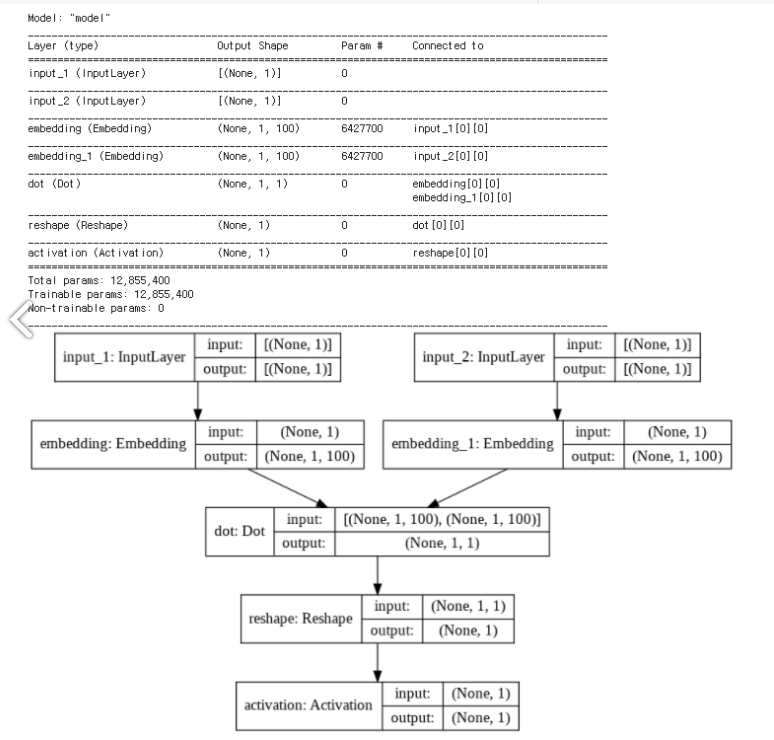

- 하이퍼파라미터인 임베딩 벡터의 차원은 100으로 정하고, 두 개의 임베딩 층을 추가

In [18]:
embedding_dim = 100

# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embedding_dim)(c_inputs)

2024-04-17 14:46:12.088689: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-17 14:46:12.191173: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-17 14:46:12.192057: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-17 14:46:12.195616: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-17 14:46:12.196204: I tensorflow/compile

- 각 임베딩 테이블은 중심 단어와 주변 단어 각각을 위한 임베딩 테이블이며 각 단어는 임베딩 테이블을 거쳐서 내적을 수행하고, 내적의 결과는 1 또는 0을 예측하기 위해서 시그모이드 함수를 활성화 함수로 거쳐 최종 예측값을 얻습니다.

In [19]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 100)       18183900    ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 100)       18183900    ['input_2[0][0]']                
                                                                                              

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [ ]:
for epoch in range(1, 6):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)
    print('Epoch :',epoch, 'Loss :',loss)

- 결과 확인하기

In [ ]:
import gensim

f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embedding_dim))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

# 모델 로드
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [ ]:
w2v.most_similar(positive=['soldiers'])

In [ ]:
w2v.most_similar(positive=['doctor'])

In [ ]:
w2v.most_similar(positive=['police'])

In [ ]:
w2v.most_similar(positive=['knife'])

In [ ]:
w2v.most_similar(positive=['engine'])